In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
# Set dataset directory
img_dir = '/content/drive/MyDrive/Data science-Diploma/Brain Tumor Data Set'

In [3]:
BATCH_SIZE =64
IMAGE_SIZE =150
input_shape =(150,150,1)

In [4]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_gen = data_gen.flow_from_directory(img_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          color_mode="grayscale",
                                          shuffle=True,
                                          class_mode="binary",
                                         subset="training")

Found 3729 images belonging to 2 classes.


In [6]:
val_gen=data_gen.flow_from_directory(img_dir,
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       batch_size=BATCH_SIZE,
                                       color_mode="grayscale",
                                       shuffle=False,
                                       class_mode ="binary",
                                       subset="validation")

Found 931 images belonging to 2 classes.


In [7]:
labels =train_gen.class_indices
classes =list(labels.keys())
print(classes)

['Brain Tumor', 'Healthy']


**CNN Model**

In [8]:
# Build a basic CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(train_gen,verbose=1,epochs=5,validation_data=val_gen,steps_per_epoch=3729//64,validation_steps=931//64)


Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.8897 - loss: 0.2834 - val_accuracy: 0.9118 - val_loss: 0.2272
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - accuracy: 0.9219 - loss: 0.2390 - val_accuracy: 0.9714 - val_loss: 0.2003
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.9431 - loss: 0.1613 - val_accuracy: 0.9364 - val_loss: 0.1481
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 1.0000 - loss: 0.0648 - val_accuracy: 0.9714 - val_loss: 0.0815
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.9706 - loss: 0.0969 - val_accuracy: 0.9743 - val_loss: 0.0888


In [13]:
test_loss,test_acc=model.evaluate(val_gen)

15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9706 - loss: 0.0976


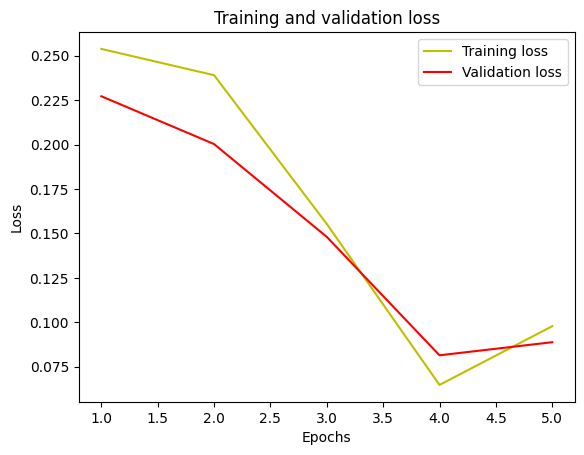

In [14]:
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



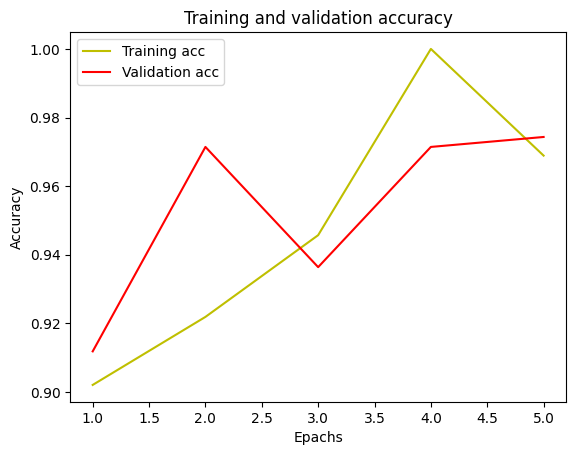

In [15]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epachs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.save('model.h5')

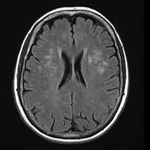

In [35]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
import numpy as np
from IPython.display import display

data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)

# Open the image file
image = Image.open(f'/content/drive/MyDrive/Data science-Diploma/Brain Tumor Data Set/Healthy/Not Cancer  (1611).jpg')

size = (150, 150)
image = ImageOps.grayscale(image)  # Convert image to grayscale
image = ImageOps.fit(image, size, Image.LANCZOS)

image_array = np.asarray(image)
display(image)  # Display the image
data =image_array.reshape((-1,150,150,1))
# Normalize image array
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Reshape the image array
#data = normalized_image_array.reshape((-1, 150, 150, 1))


In [36]:
prediction=model.predict(data)
print(prediction[0][0])

if prediction == 1.0 :
  print("Brain Tumor not Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1.0
Brain Tumor not Detected


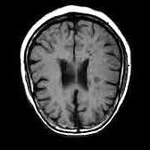

In [33]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
import numpy as np
from IPython.display import display

data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)

# Open the image file
image = Image.open(f'/content/drive/MyDrive/Data science-Diploma/Brain Tumor Data Set/Healthy/Not Cancer  (1211).jpg')

size = (150, 150)
image = ImageOps.grayscale(image)  # Convert image to grayscale
image = ImageOps.fit(image, size, Image.LANCZOS)

image_array = np.asarray(image)
display(image)  # Display the image
data =image_array.reshape((-1,150,150,1))

In [34]:
prediction=model.predict(data)
print(prediction[0][0])

if prediction == 1.0 :
  print("Brain Tumor not Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1.0
Brain Tumor not Detected


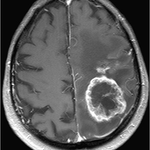

In [31]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
import numpy as np
from IPython.display import display

data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)

# Open the image file
image = Image.open(f'/content/drive/MyDrive/Data science-Diploma/Brain Tumor Data Set/Brain Tumor/Cancer (1110).jpg')

size = (150, 150)
image = ImageOps.grayscale(image)  # Convert image to grayscale
image = ImageOps.fit(image, size, Image.LANCZOS)

image_array = np.asarray(image)
display(image)  # Display the image
data =image_array.reshape((-1,150,150,1))

In [32]:
prediction=model.predict(data)
print(prediction[0][0])

if prediction != 1.0 :
  print("Brain Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0.0
Brain Tumor Detected


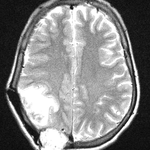

In [28]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
import numpy as np
from IPython.display import display

data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)

# Open the image file
image = Image.open(f'/content/drive/MyDrive/Data science-Diploma/Brain Tumor Data Set/Brain Tumor/Cancer (1210).jpg')

size = (150, 150)
image = ImageOps.grayscale(image)  # Convert image to grayscale
image = ImageOps.fit(image, size, Image.LANCZOS)

image_array = np.asarray(image)
display(image)  # Display the image
data =image_array.reshape((-1,150,150,1))

In [30]:
prediction=model.predict(data)
print(prediction[0][0])

if prediction != 1.0 :
  print("Brain Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0.0
Brain Tumor Detected


In [37]:
model.save('model.h5')

**Brain Tumor Detection Dataset**

In [40]:
df = pd.read_excel('/content/brain_tumor_detection_data.xlsx')

In [41]:
df.head()

,Image,Brain Tumor,Healthy,Month,Price,Area
0,Not cancer(1).png,0,1,June,600,Hospitals and Clinics
1,Cancer(2).png,1,0,May,500,Hospitals and Clinics
2,Not cancer(3).png,0,1,July,600,Hospitals and Clinics
3,Cancer(4).png,1,0,December,500,Health Tech Companies
4,Not cancer(5).png,0,1,August,600,Patients in Remote Areas


In [38]:
# Revenue calculation
unit_cost = 500  # Price per scan
operational_cost = 2000  # Monthly operational cost
scans_sold = 200  # Example scans sold

In [39]:
# Revenue equation
revenue = unit_cost * scans_sold - operational_cost
print(f"Total Revenue for the month: Rs. {revenue}")

Total Revenue for the month: Rs. 98000


<ipython-input-42-0d6c7992b8a5>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby('Month')['Price'].sum().sort_index() - operational_cost


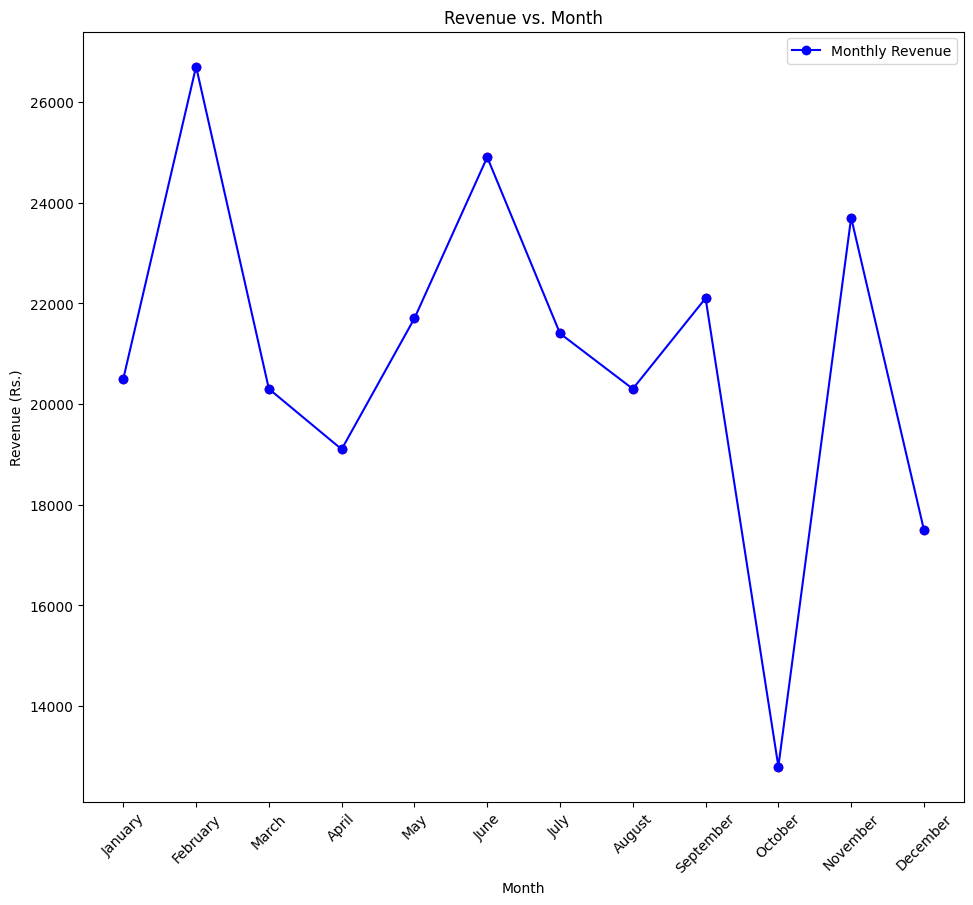

In [42]:
# Prepare data for plotting
df['Month'] = pd.Categorical(df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

operational_cost = 2000  # Monthly operational cost
# Calculate monthly revenue

# Revenue equation
#revenue = unit_cost * scans_sold - operational_cost
monthly_revenue = df.groupby('Month')['Price'].sum().sort_index() - operational_cost
months = monthly_revenue.index

# Plot for revenue vs sales (monthly)
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(months, monthly_revenue, label='Monthly Revenue', color='blue', marker='o')
plt.scatter(months, monthly_revenue, color='red')  # Current Revenue Points
plt.title('Revenue vs. Month')
plt.xlabel('Month')
plt.ylabel('Revenue (Rs.)')
plt.xticks(rotation=45)
plt.legend()

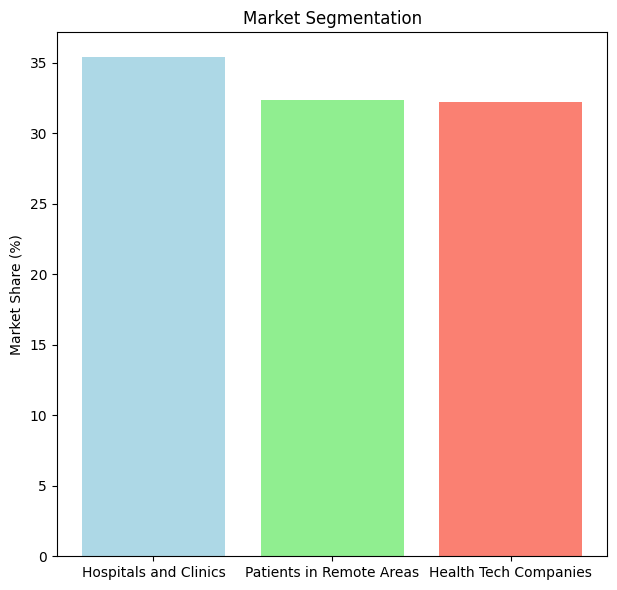

In [43]:

plt.figure(figsize=(12, 6))
segments = ['Hospitals and Clinics', 'Patients in Remote Areas', 'Health Tech Companies']
values = df['Area'].value_counts(normalize=True) * 100  # Calculate market share percentages
plt.subplot(1, 2, 2)
plt.bar(segments, values, color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Market Segmentation')
plt.ylabel('Market Share (%)')

plt.tight_layout()
plt.show()